In [307]:
import sys
import pickle
import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#features_list = ['poi','salary', 'from_messages'] # You will need to use more features
#features_list = ['poi','salary','bonus']
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
data_dict.pop('TOTAL', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [308]:
# Use data_dict to create DataFrame.  
# Transpose to make the rows represent each person in the dictionary.
enron_df = pd.DataFrame(data_dict).T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [309]:
print enron_df.index.values
print enron_df.ix['LAY KENNETH L']

['ALLEN PHILLIP K' 'BADUM JAMES P' 'BANNANTINE JAMES M' 'BAXTER JOHN C'
 'BAY FRANKLIN R' 'BAZELIDES PHILIP J' 'BECK SALLY W' 'BELDEN TIMOTHY N'
 'BELFER ROBERT' 'BERBERIAN DAVID' 'BERGSIEKER RICHARD P'
 'BHATNAGAR SANJAY' 'BIBI PHILIPPE A' 'BLACHMAN JEREMY M'
 'BLAKE JR. NORMAN P' 'BOWEN JR RAYMOND M' 'BROWN MICHAEL'
 'BUCHANAN HAROLD G' 'BUTTS ROBERT H' 'BUY RICHARD B'
 'CALGER CHRISTOPHER F' 'CARTER REBECCA C' 'CAUSEY RICHARD A' 'CHAN RONNIE'
 'CHRISTODOULOU DIOMEDES' 'CLINE KENNETH W' 'COLWELL WESLEY'
 'CORDES WILLIAM R' 'COX DAVID' 'CUMBERLAND MICHAEL S' 'DEFFNER JOSEPH M'
 'DELAINEY DAVID W' 'DERRICK JR. JAMES V' 'DETMERING TIMOTHY J'
 'DIETRICH JANET R' 'DIMICHELE RICHARD G' 'DODSON KEITH'
 'DONAHUE JR JEFFREY M' 'DUNCAN JOHN H' 'DURAN WILLIAM D' 'ECHOLS JOHN B'
 'ELLIOTT STEVEN' 'FALLON JAMES B' 'FASTOW ANDREW S' 'FITZGERALD JAY L'
 'FOWLER PEGGY' 'FOY JOE' 'FREVERT MARK A' 'FUGH JOHN L' 'GAHN ROBERT S'
 'GARLAND C KEVIN' 'GATHMANN WILLIAM D' 'GIBBS DANA R' 'GILLIS JOHN'
 'GLIS

In [310]:
enron_df.replace(to_replace = 'NaN', value = 0.0)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,0.0,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,...,0.0,69.0,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0
BAZELIDES PHILIP J,0.0,684694.0,0.0,0.0,0,1599641.0,0.0,0.0,0.0,0.0,...,93750.0,874.0,False,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0
BECK SALLY W,700000.0,0.0,0.0,0.0,sally.beck@enron.com,0.0,37172.0,4343.0,144.0,386.0,...,0.0,566.0,False,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,0.0,-102500.0,0.0,3285.0,0,3285.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0
BERBERIAN DAVID,0.0,0.0,0.0,0.0,david.berberian@enron.com,1624396.0,11892.0,0.0,0.0,0.0,...,0.0,0.0,False,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0


In [311]:
non_number_columns = ['email_address', 'poi']
enron_df_converted = pd.DataFrame()
for column in enron_df.columns.values:
    if column not in non_number_columns:
        enron_df_converted[column] = enron_df[column].astype(float)
    else:
        enron_df_converted[column] = enron_df[column]

In [312]:
enron_df_converted = enron_df_converted.fillna(0)

In [313]:
enron_df_converted

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,NaN,257817.0,3486.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,0.0,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,NaN,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,...,0.0,69.0,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0
BAZELIDES PHILIP J,0.0,684694.0,0.0,0.0,NaN,1599641.0,0.0,0.0,0.0,0.0,...,93750.0,874.0,False,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0
BECK SALLY W,700000.0,0.0,0.0,0.0,sally.beck@enron.com,0.0,37172.0,4343.0,144.0,386.0,...,0.0,566.0,False,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,0.0,-102500.0,0.0,3285.0,NaN,3285.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0
BERBERIAN DAVID,0.0,0.0,0.0,0.0,david.berberian@enron.com,1624396.0,11892.0,0.0,0.0,0.0,...,0.0,0.0,False,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0


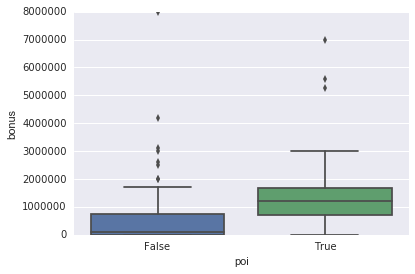

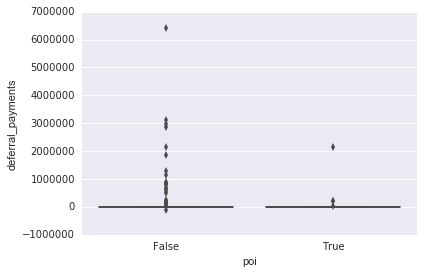

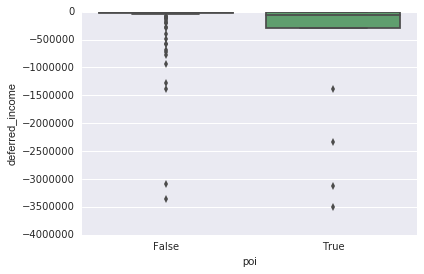

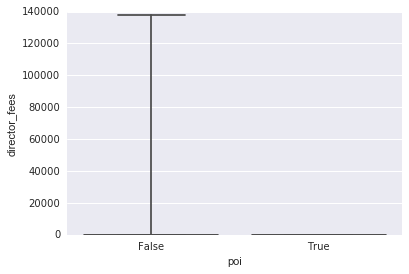

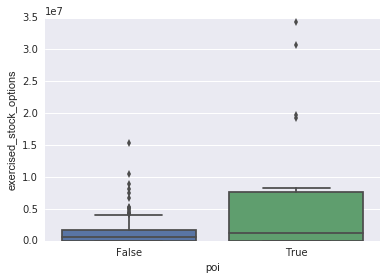

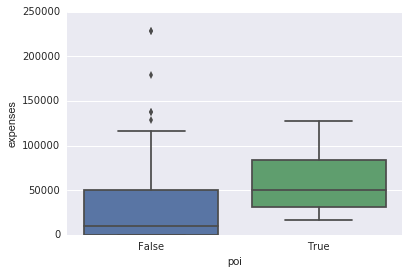

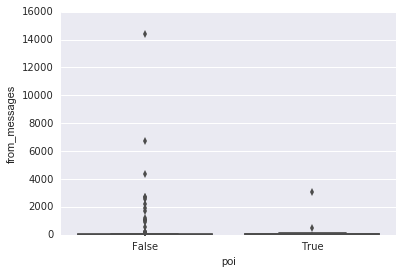

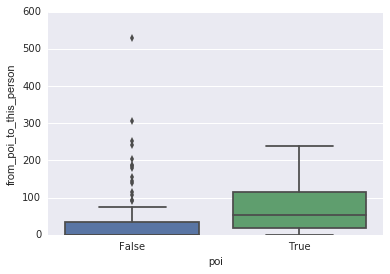

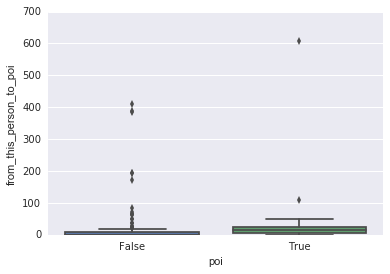

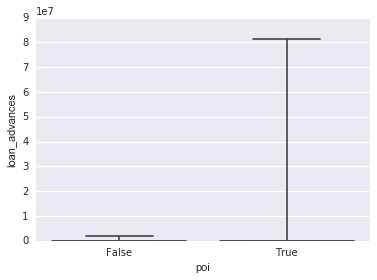

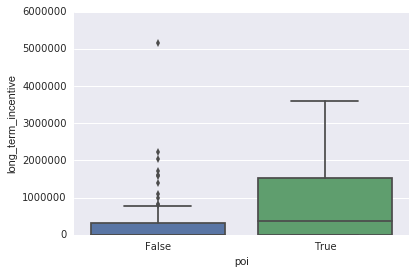

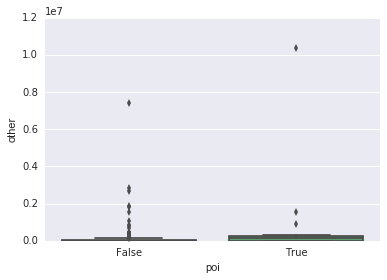

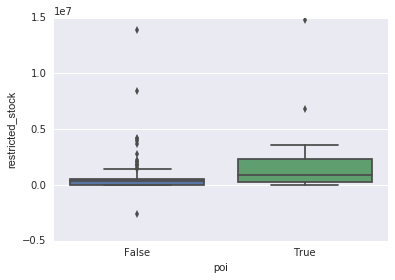

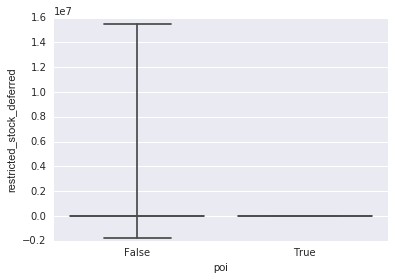

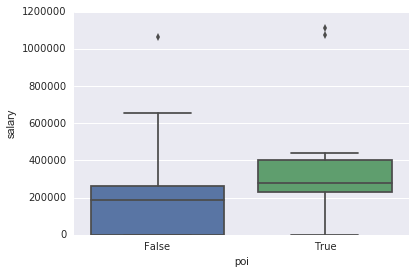

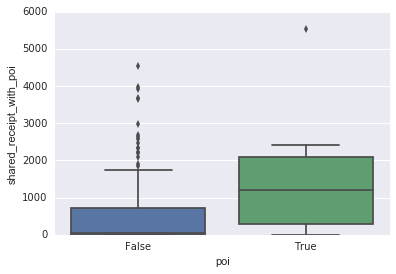

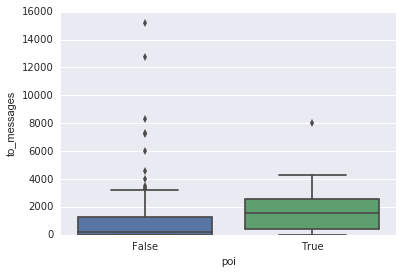

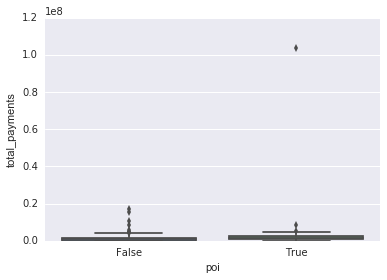

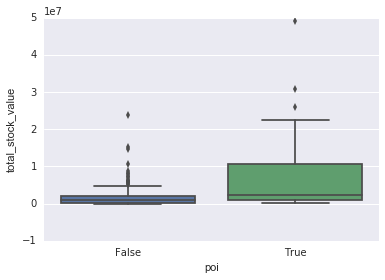

In [314]:
# Compare distributions of non-POIs and POIs for each of the numerical columns

for column in enron_df_converted.columns.values:
    if column not in non_number_columns:
        sns.boxplot(x = 'poi', y = column, data = enron_df_converted)
        plt.show()